Name: Shreyas Dongre   
Roll no: 082          
Stream: CS (AI)      
Division: I                         
Semester: 4th Semester                                           
Batch: I-3            
                                                                       Date: 14/1/2022       
Subject: ML
###Experiment-4

In [ ]:
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv("MLR_data.csv")

In [ ]:
df.head()

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


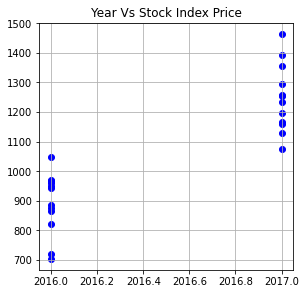

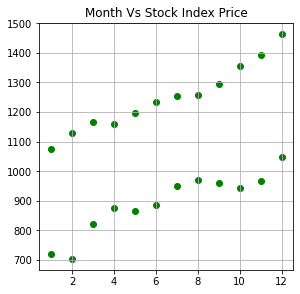

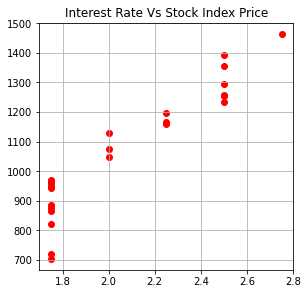

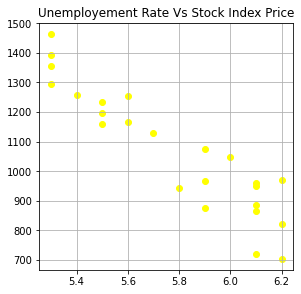

In [ ]:
#Plot scatter plots of dependent variable(stock index price) with the independent variables.
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("Year Vs Stock Index Price")
plt.scatter(df["Year"],df['Stock_Index_Price'],color='blue')
plt.grid(True)

plt.figure(figsize=(10,10))
plt.subplot(2,2,2)
plt.title("Month Vs Stock Index Price")
plt.scatter(df['Month'],df['Stock_Index_Price'],color='green')
plt.grid(True)

plt.figure(figsize=(10,10))
plt.subplot(2,2,3)
plt.title("Interest Rate Vs Stock Index Price")
plt.scatter(df['Interest_Rate'],df['Stock_Index_Price'],color='red')
plt.grid(True)

plt.figure(figsize=(10,10))
plt.subplot(2,2,4)
plt.title("Unemployement Rate Vs Stock Index Price")
plt.scatter(df['Unemployment_Rate'],df['Stock_Index_Price'],color='yellow')
plt.grid(True)

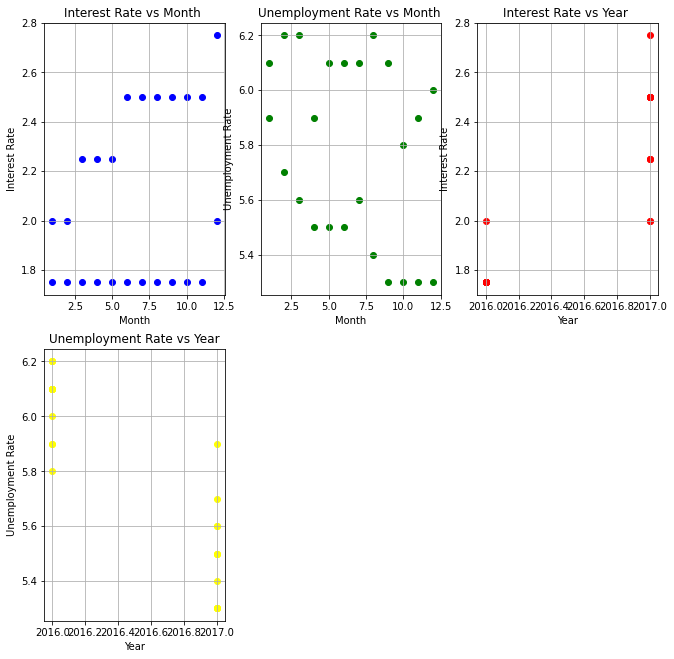

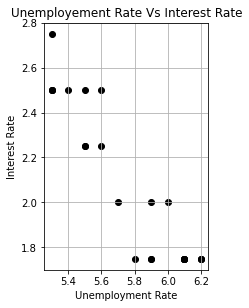

In [ ]:
#plotting independent variables against each other
plt.figure(figsize=(11,11))
plt.subplot(2,3,1)
plt.scatter(df['Month'],df['Interest_Rate'],color='blue')
plt.title('Interest Rate vs Month ')
plt.xlabel('Month')
plt.ylabel('Interest Rate')
plt.grid(True)

plt.subplot(2,3,2)
plt.scatter(df['Month'],df['Unemployment_Rate'],color='green')
plt.title('Unemployment Rate vs Month ')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate')
plt.grid(True)

plt.subplot(2,3,3)
plt.scatter(df['Year'],df['Interest_Rate'],color='red')
plt.title('Interest Rate vs Year ')
plt.xlabel('Year')
plt.ylabel('Interest Rate')
plt.grid(True)

plt.subplot(2,3,4)
plt.scatter(df['Year'],df['Unemployment_Rate'],color='yellow')
plt.title('Unemployment Rate vs Year')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.grid(True)


plt.figure(figsize=(10,10))
plt.subplot(2,3,5)
plt.title("Unemployement Rate Vs Interest Rate")
plt.xlabel("Unemployment Rate")
plt.ylabel("Interest Rate")
plt.scatter(df['Unemployment_Rate'],df['Interest_Rate'],color='black')
plt.grid(True)

####Regression Model 1 (Interest Rate Vs Stock Index Price):

In [ ]:
x=df['Interest_Rate']       #independent var
y=df['Stock_Index_Price']   #dependent var
x=np.copy(x)
y=np.copy(y)

In [ ]:
#creating the model 
model=LinearRegression()

In [ ]:
x=x.reshape((-1,1))  #converting independent var into 2d. Required bec linear regressrion requires independent vars to be 2 dimensional.
x.shape

(24, 1)

In [ ]:
#fitting model onto the data.
model.fit(x,y)

LinearRegression()

In [ ]:
r_sq=model.score(x,y)
r_sq

0.8757089547891359

In [ ]:
print("Intercept:",model.intercept_)
print("Coefficient:",model.coef_)

Intercept: -99.46431881371655
Coefficient: [564.20389249]


In [ ]:
x_predict=x                          #taking array x and predicting it using the model.
y_predict=model.predict(x_predict)

In [ ]:
print("Original y:",y)
print("Predicted y:",y_predict)

Original y: [1464 1394 1357 1293 1256 1254 1234 1195 1159 1167 1130 1075 1047  965
  943  958  971  949  884  866  876  822  704  719]
Predicted y: [1452.09638554 1311.04541242 1311.04541242 1311.04541242 1311.04541242
 1311.04541242 1311.04541242 1169.9944393  1169.9944393  1169.9944393
 1028.94346617 1028.94346617 1028.94346617  887.89249305  887.89249305
  887.89249305  887.89249305  887.89249305  887.89249305  887.89249305
  887.89249305  887.89249305  887.89249305  887.89249305]


Text(0.5, 1.0, 'Simple Linear Regresssion')

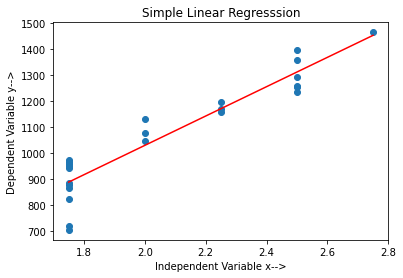

In [ ]:
#Visualizing Regression Line
plt.scatter(x,y)
plt.plot(x_predict,y_predict,"r-")
plt.xlabel("Independent Variable x-->")
plt.ylabel("Dependent Variable y-->")
plt.title("Simple Linear Regresssion")

In [ ]:
#Model 1: Independent Variable: Interest Rate
x=sm.add_constant(x)
result=sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     155.0
Date:                Sat, 05 Mar 2022   Prob (F-statistic):           1.95e-11
Time:                        12:41:57   Log-Likelihood:                -136.94
No. Observations:                  24   AIC:                             277.9
Df Residuals:                      22   BIC:                             280.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -99.4643     95.210     -1.045      0.308    -296.918      97.990
x1           564.2039     45.317     12.450      0.000     470.221     658.186
==============================================================================
Omnibus:                        5.361   Durbin-Watson:                   0.514
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                3.647
Skew:                          -0.927   Prob(JB):                        0.161
Kurtosis:                       3.459   Cond. No.                         15.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

####Regression Model 2 (Unemployment Rate Vs Stock Index Price):

In [ ]:
x1=df['Unemployment_Rate']     #independent var
y1=df['Stock_Index_Price']   #dependent var
x1=np.copy(x1)
y1=np.copy(y1)

In [ ]:
x1=x1.reshape((-1,1))  #converting independent var into 2d. Required bec linear regressrion requires independent vars to be 2 dimensional.
x1.shape

(24, 1)

In [ ]:
model.fit(x1,y1)

LinearRegression()

In [ ]:
r_sq1=model.score(x1,y1)
r_sq1

0.850706607677214

In [ ]:
print("Intercept:",model.intercept_)
print("Coefficient:",model.coef_)

Intercept: 4471.339321357287
Coefficient: [-588.96207585]


In [ ]:
x_predict1=x1                          #taking array x and predicting it using the model.
y_predict1=model.predict(x_predict1)

In [ ]:
print("Original y:",y1)
print("Predicted y:",y_predict1)

Original y: [1464 1394 1357 1293 1256 1254 1234 1195 1159 1167 1130 1075 1047  965
  943  958  971  949  884  866  876  822  704  719]
Predicted y: [1349.84031936 1349.84031936 1349.84031936 1349.84031936 1290.94411178
 1173.15169661 1232.04790419 1232.04790419 1232.04790419 1173.15169661
 1114.25548902  996.46307385  937.56686627  996.46307385 1055.35928144
  878.67065868  819.7744511   878.67065868  878.67065868  878.67065868
  996.46307385  819.7744511   819.7744511   878.67065868]


Text(0.5, 1.0, 'Simple Linear Regresssion')

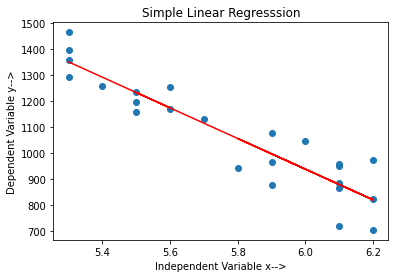

In [ ]:
#Visualizing Regression Line
plt.scatter(x1,y1)
plt.plot(x_predict1,y_predict1,"r-")
plt.xlabel("Independent Variable x-->")
plt.ylabel("Dependent Variable y-->")
plt.title("Simple Linear Regresssion")

In [ ]:
#Model 2: Independent Variable: Unemployment Rate
x1=sm.add_constant(x1)
result1=sm.OLS(y1,x1).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     125.4
Date:                Sat, 05 Mar 2022   Prob (F-statistic):           1.49e-10
Time:                        12:41:57   Log-Likelihood:                -139.14
No. Observations:                  24   AIC:                             282.3
Df Residuals:                      22   BIC:                             284.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4471.3393    304.254     14.696      0.000    3840.354    5102.324
x1          -588.9621     52.602    -11.196      0.000    -698.053    -479.871
==============================================================================
Omnibus:                        0.397   Durbin-Watson:                   1.083
Prob(Omnibus):                  0.820   Jarque-Bera (JB):                0.535
Skew:                          -0.105   Prob(JB):                        0.765
Kurtosis:                       2.299   Cond. No.                         107.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Model 3: Independent Variable: Year

x3 = sm.add_constant(df['Year'])
model3 = sm.OLS(df['Stock_Index_Price'], x3).fit()
model3.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Stock_Index_Price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     64.33
Date:                Sat, 05 Mar 2022   Prob (F-statistic):           5.65e-08
Time:                        12:41:57   Log-Likelihood:                -145.55
No. Observations:                  24   AIC:                             295.1
Df Residuals:                      22   BIC:                             297.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.171e+05   8.95e+04     -8.009      0.000   -9.03e+05   -5.31e+05
Year         356.1667     44.406      8.021      0.000     264.075     448.259
==============================================================================
Omnibus:                        0.119   Durbin-Watson:                   0.603
Prob(Omnibus):                  0.942   Jarque-Bera (JB):                0.341
Skew:                          -0.025   Prob(JB):                        0.843
Kurtosis:                       2.418   Cond. No.                     8.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Model 4: Independent Variable: Month

x4 = sm.add_constant(df['Month'])
model4 = sm.OLS(df['Stock_Index_Price'], x4).fit()
model4.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Stock_Index_Price   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     6.632
Date:                Sat, 05 Mar 2022   Prob (F-statistic):             0.0173
Time:                        12:41:57   Log-Likelihood:                -158.80
No. Observations:                  24   AIC:                             321.6
Df Residuals:                      22   BIC:                             323.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        883.1288     82.197     10.744      0.000     712.663    1053.595
Month         28.7622     11.168      2.575      0.017       5.600      51.924
==============================================================================
Omnibus:                       46.538   Durbin-Watson:                   0.184
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.514
Skew:                          -0.038   Prob(JB):                        0.173
Kurtosis:                       1.127   Cond. No.                         15.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Model 5: Independent Variable: Year,Month

x5 = df[['Year', 'Month']]
model5 = sm.OLS(df['Stock_Index_Price'], x5).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Stock_Index_Price   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              389.5
Date:                Sat, 05 Mar 2022   Prob (F-statistic):                    6.72e-18
Time:                        12:41:57   Log-Likelihood:                         -158.77
No. Observations:                  24   AIC:                                      321.5
Df Residuals:                      22   BIC:                                      323.9
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year           0.4381      0.041     10.759      0.000       0.354       0.522
Month         28.7382     11.155      2.576      0.017       5.604      51.872
==============================================================================
Omnibus:                       46.462   Durbin-Watson:                   0.184
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.513
Skew:                          -0.038   Prob(JB):                        0.173
Kurtosis:                       1.127   Cond. No.                         584.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Model 6: Independent Variable: Year, Interest Rate

x6 = df[['Year', 'Interest_Rate']]
model6 = sm.OLS(df['Stock_Index_Price'], x6).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Stock_Index_Price   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              2459.
Date:                Sat, 05 Mar 2022   Prob (F-statistic):                    1.37e-26
Time:                        12:41:57   Log-Likelihood:                         -136.94
No. Observations:                  24   AIC:                                      277.9
Df Residuals:                      22   BIC:                                      280.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Year             -0.0494      0.047     -1.044      0.308      -0.147       0.049
Interest_Rate   564.2339     45.379     12.434      0.000     470.123     658.345
==============================================================================
Omnibus:                        5.363   Durbin-Watson:                   0.514
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                3.649
Skew:                          -0.927   Prob(JB):                        0.161
Kurtosis:                       3.460   Cond. No.                     5.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Model 7: Independent Variable: Year, Unemployment_Rate

x7 = df[['Year', 'Unemployment_Rate']]
model7 = sm.OLS(df['Stock_Index_Price'], x7).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Stock_Index_Price   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              2053.
Date:                Sat, 05 Mar 2022   Prob (F-statistic):                    9.85e-26
Time:                        12:41:57   Log-Likelihood:                         -139.09
No. Observations:                  24   AIC:                                      282.2
Df Residuals:                      22   BIC:                                      284.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Year                  2.2092      0.150     14.727      0.000       1.898       2.520
Unemployment_Rate  -586.1133     52.298    -11.207      0.000    -694.572    -477.655
==============================================================================
Omnibus:                        0.383   Durbin-Watson:                   1.080
Prob(Omnibus):                  0.826   Jarque-Bera (JB):                0.526
Skew:                          -0.101   Prob(JB):                        0.769
Kurtosis:                       2.303   Cond. No.                     6.22e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Model 8: Independent Variable: Month, Interest Rate

x8 = df[['Interest_Rate', 'Month']]
model8 = sm.OLS(df['Stock_Index_Price'], x8).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Stock_Index_Price   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              3077.
Date:                Sat, 05 Mar 2022   Prob (F-statistic):                    1.17e-27
Time:                        12:41:57   Log-Likelihood:                         -134.26
No. Observations:                  24   AIC:                                      272.5
Df Residuals:                      22   BIC:                                      274.9
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Interest_Rate   482.3248     14.955     32.252      0.000     451.310     513.340
Month            11.1883      4.269      2.621      0.016       2.335      20.042
==============================================================================
Omnibus:                        2.248   Durbin-Watson:                   0.716
Prob(Omnibus):                  0.325   Jarque-Bera (JB):                0.885
Skew:                          -0.302   Prob(JB):                        0.643
Kurtosis:                       3.720   Cond. No.                         8.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Model 9: Independent Variable: Month, Unemployment Rate

x9 = df[['Unemployment_Rate', 'Month']]
model9 = sm.OLS(df['Stock_Index_Price'], x9).fit()
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Stock_Index_Price   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              255.7
Date:                Sat, 05 Mar 2022   Prob (F-statistic):                    5.88e-16
Time:                        12:41:57   Log-Likelihood:                         -163.65
No. Observations:                  24   AIC:                                      331.3
Df Residuals:                      22   BIC:                                      333.7
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Unemployment_Rate   139.4863     16.703      8.351      0.000     104.846     174.127
Month                39.0823     13.127      2.977      0.007      11.859      66.306
==============================================================================
Omnibus:                       48.791   Durbin-Watson:                   0.216
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.559
Skew:                          -0.058   Prob(JB):                        0.169
Kurtosis:                       1.117   Cond. No.                         3.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Model 10: Independent Variable: Interest Rate, Unemployment Rate

x10 =  df[['Unemployment_Rate','Interest_Rate']]
model10 = sm.OLS(df['Stock_Index_Price'], x10).fit()
model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Stock_Index_Price   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              2508.
Date:                Sat, 05 Mar 2022   Prob (F-statistic):                    1.10e-26
Time:                        12:41:57   Log-Likelihood:                         -136.70
No. Observations:                  24   AIC:                                      277.4
Df Residuals:                      22   BIC:                                      279.8
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Unemployment_Rate   -15.4025     12.366     -1.246      0.226     -41.047      10.242
Interest_Rate       558.9088     34.043     16.418      0.000     488.308     629.510
==============================================================================
Omnibus:                        4.661   Durbin-Watson:                   0.513
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                3.139
Skew:                          -0.870   Prob(JB):                        0.208
Kurtosis:                       3.330   Cond. No.                         14.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Model 11: Independent Variable: Month, Interest rate, Unemployment rate

x11 = df[['Interest_Rate', 'Unemployment_Rate', 'Month']]
model11 = sm.OLS(df['Stock_Index_Price'], x11).fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Stock_Index_Price   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              2115.
Date:                Sat, 05 Mar 2022   Prob (F-statistic):                    3.32e-26
Time:                        12:41:57   Log-Likelihood:                         -133.34
No. Observations:                  24   AIC:                                      272.7
Df Residuals:                      21   BIC:                                      276.2
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Interest_Rate       521.3287     33.544     15.542      0.000     451.570     591.087
Unemployment_Rate   -14.2501     11.010     -1.294      0.210     -37.148       8.647
Month                10.9696      4.209      2.607      0.016       2.218      19.722
==============================================================================
Omnibus:                        0.998   Durbin-Watson:                   0.825
Prob(Omnibus):                  0.607   Jarque-Bera (JB):                0.152
Skew:                          -0.049   Prob(JB):                        0.927
Kurtosis:                       3.377   Cond. No.                         23.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Model 12: Independent Variable: Year, Interest rate, Unemployment rate

x12 = df[['Interest_Rate', 'Unemployment_Rate', 'Year']]
model12 = sm.OLS(df['Stock_Index_Price'], x12).fit()
model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Stock_Index_Price   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              1902.
Date:                Sat, 05 Mar 2022   Prob (F-statistic):                    1.00e-25
Time:                        12:41:57   Log-Likelihood:                         -134.60
No. Observations:                  24   AIC:                                      275.2
Df Residuals:                      21   BIC:                                      278.7
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Interest_Rate       344.5792    111.642      3.086      0.006     112.406     576.752
Unemployment_Rate  -249.9153    117.627     -2.125      0.046    -494.535      -5.296
Year                  0.8922      0.445      2.003      0.058      -0.034       1.818
==============================================================================
Omnibus:                        2.689   Durbin-Watson:                   0.529
Prob(Omnibus):                  0.261   Jarque-Bera (JB):                1.550
Skew:                          -0.612   Prob(JB):                        0.461
Kurtosis:                       3.226   Cond. No.                     2.23e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Model 13: Independent Variable: Year, Month, Interest rate, Unemployment rate

x13 = df[['Interest_Rate', 'Unemployment_Rate', 'Year', 'Month']]
model13 = sm.OLS(df['Stock_Index_Price'], x13).fit()
model13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Stock_Index_Price   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              1814.
Date:                Sat, 05 Mar 2022   Prob (F-statistic):                    2.70e-25
Time:                        12:41:57   Log-Likelihood:                         -131.14
No. Observations:                  24   AIC:                                      270.3
Df Residuals:                      20   BIC:                                      275.0
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Interest_Rate       332.9934     99.154      3.358      0.003     126.163     539.824
Unemployment_Rate  -223.2203    104.872     -2.128      0.046    -441.980      -4.461
Year                  0.7947      0.397      2.002      0.059      -0.033       1.623
Month                10.2172      3.954      2.584      0.018       1.970      18.465
==============================================================================
Omnibus:                        0.453   Durbin-Watson:                   0.792
Prob(Omnibus):                  0.797   Jarque-Bera (JB):                0.020
Skew:                           0.059   Prob(JB):                        0.990
Kurtosis:                       3.078   Cond. No.                     2.23e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
data = [[1, 'Interest Rate', 0.876, 0.870, 0.308, 0 ], 
        [2, 'Unemployment Rate', 0.851, 0.844, 0, 0 ],
        [3, 'Year', 0.745, 0.734, 0, 0 ], 
        [4, 'Month', 0.232, 0.197, 0, 0.017 ],      
        [5, 'Year, Month', 0.973, 0.970, 0, '0, 0.017'],
        [6, 'Year, Interest Rate', 0.996, 0.995, 0, '0.308, 0'],
        [7, 'Year, Unemployment Rate', 0.995, 0.994, 0, '0, 0'],
        [8, 'Month, Interest Rate', 0.996, 0.996, 0, '0.016, 0' ],
        [9, 'Month, Unemployment Rate', 0.959, 0.955, 0, '0.007, 0' ],
        [10, 'Interest Rate, Unemployment Rate', 0.996, 0.995, 0, '0, 0.226'],
        [11, 'Month, Interest rate, Unemployment rate', 0.997, 0.996, 0, '0.016, 0.210, 0'],
        [12, 'Year, Interest rate, Unemployment rate', 0.996, 0.996, 0, '0.058, 0.046, 0.006'],
        [13, 'Year, Month, Interest rate, Unemployment rate', 0.997, 0.997, 0, '0.059, 0.018, 0.003, 0.46']
        ]

df2 = pd.DataFrame(data, columns = ['Model No.', 'Independent Variable/s (X)', 'R squared', 
                                    'Adjusted R values', 'P value (const)', 'P value (X)'])

display(df2)

,Model No.,Independent Variable/s (X),R squared,Adjusted R values,P value (const),P value (X)
0,1,Interest Rate,0.876,0.870,0.308,0
1,2,Unemployment Rate,0.851,0.844,0.000,0
2,3,Year,0.745,0.734,0.000,0
3,4,Month,0.232,0.197,0.000,0.017
4,5,"Year, Month",0.973,0.970,0.000,"0, 0.017"
5,6,"Year, Interest Rate",0.996,0.995,0.000,"0.308, 0"
6,7,"Year, Unemployment Rate",0.995,0.994,0.000,"0, 0"
7,8,"Month, Interest Rate",0.996,0.996,0.000,"0.016, 0"
8,9,"Month, Unemployment Rate",0.959,0.955,0.000,"0.007, 0"
9,10,"Interest Rate, Unemployment Rate",0.996,0.995,0.000,"0, 0.226"


###Conclusion:
1) Identified dependent and independant variables and implemented linear regression between the dependant and independant variables.    
2) Calculated T statistic and P value with help of OLS library and also calculated  r square, slope for all regression models.    
3) Greater the value of R square, more fitter the model. A lower p value(<0.05) indicates rejection of null hypothesis.

In [1]:
! jupyter nbconvert --to html I082_Shreyas_Dongre_ML_Prac4.ipynb

[NbConvertApp] Converting notebook I082_Shreyas_Dongre_ML_Prac4.ipynb to html
[NbConvertApp] Writing 506309 bytes to I082_Shreyas_Dongre_ML_Prac4.html
